# **KOULAL Yidhir Aghiles**
#AFC
L'AFC (Analyse Factorielle des Correspondances) est une méthode statistique utilisée pour explorer et visualiser les relations entre plusieurs variables qualitatives. Il s'agit d'une technique d'analyse des données multivariées qui permet de réduire la dimensionnalité des données en représentant les variables sous forme de facteurs. Les facteurs sont des axes sur lesquels les variables sont corrélées les unes aux autres, permettant une visualisation plus simple des relations entre les variables. L'AFC peut être utilisée pour comprendre les structures complexes de relations entre les variables et pour identifier les groupes de variables similaires.

##Les lebreries utilisées

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA

##La matrice de contingence K

In [ ]:
K = np.array([[1,1,0], [1,1,1], [1,0,0], [0,1,1], [0,0,1]])
K

array([[1, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 1]])

##Calcul de la matrice des fréquences relatives

In [ ]:
def matrice_frequences_relatives(m):
  fr = np.zeros(m.shape)
  s = np.sum(m[:,:])
  for i in range(len(m)):
    
    for j in range(len(m[i])):
    
      fr[i][j] = m[i][j] / s
      #print(np.sum(m[:,:])) 

  return fr

In [ ]:
fr = matrice_frequences_relatives(K)
fr

array([[0.11111111, 0.11111111, 0.        ],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.        , 0.        ],
       [0.        , 0.11111111, 0.11111111],
       [0.        , 0.        , 0.11111111]])

##Calcul de la matrice des profils-lignes transformée et centrée

In [ ]:
#1- la matrice profil lignes
pligne = np.zeros_like(fr)

for i in range (K.shape[0]):
    for j in range (K.shape[1]):
        pligne[i][j] = fr[i][j] / sum(fr[i, :])

pligne

array([[0.5       , 0.5       , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        ]])

In [ ]:
#2- le centre de gravité
g = [ ]
g.append(np.sqrt(sum(fr[:, 0])))
g.append(np.sqrt(sum(fr[:, 1])))
g.append(np.sqrt(sum(fr[:, 2])))
g=np.array(g)
g

array([0.57735027, 0.57735027, 0.57735027])

In [ ]:
#3- la matrice des profils lignes transformé
mplt = np.zeros((5,3))

for i in range (K.shape[0]):
    for j in range (K.shape[1]):
        mplt[i][j] = pligne[i][j] / np.sqrt(sum(fr[:, 0])) 
mplt

array([[0.8660254 , 0.8660254 , 0.        ],
       [0.57735027, 0.57735027, 0.57735027],
       [1.73205081, 0.        , 0.        ],
       [0.        , 0.8660254 , 0.8660254 ],
       [0.        , 0.        , 1.73205081]])

In [ ]:
#4- la matrice des profils lignes transformé et centrée
Y = np.zeros_like(mplt)

for i in range (K.shape[0]):
    for j in range (K.shape[1]):
        Y[i][j] = mplt[i][j] - g[j]

Y

array([[ 0.28867513,  0.28867513, -0.57735027],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.15470054, -0.57735027, -0.57735027],
       [-0.57735027,  0.28867513,  0.28867513],
       [-0.57735027, -0.57735027,  1.15470054]])

##Les frequences marginales lignes

In [ ]:
fml = [ ]
fml.append(np.sum(fr[0, :]))
fml.append(np.sum(fr[1, :]))
fml.append(np.sum(fr[2, :]))
fml.append(np.sum(fr[3, :]))
fml.append(np.sum(fr[4, :]))
fml = np.array(fml)


fmc = [ ]
fmc.append(np.sum(fr[ :,0]))
fmc.append(np.sum(fr[ :,1]))
fmc.append(np.sum(fr[:,2]))
fmc = np.array(fmc)
print(fml,fmc)

[0.22222222 0.33333333 0.11111111 0.22222222 0.11111111] [0.33333333 0.33333333 0.33333333]


##La matrice d'inertie V

In [ ]:
I = np.zeros((5,5))
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if (i==j):
      I[i][j]=fml[j]
I      

array([[0.22222222, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.22222222, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.11111111]])

In [ ]:
#La matrice d'inertie
V =np.matmul(np.matmul(Y.T, I), Y)
V

array([[ 0.27777778, -0.05555556, -0.22222222],
       [-0.05555556,  0.11111111, -0.05555556],
       [-0.22222222, -0.05555556,  0.27777778]])

Les valeurs propres : 
 [ 5.00000000e-01 -3.63508424e-17  1.66666667e-01] 


Les vecteurs propes : 
 [[-7.07106781e-01  5.77350269e-01  4.08248290e-01]
 [-2.18122638e-16  5.77350269e-01 -8.16496581e-01]
 [ 7.07106781e-01  5.77350269e-01  4.08248290e-01]]


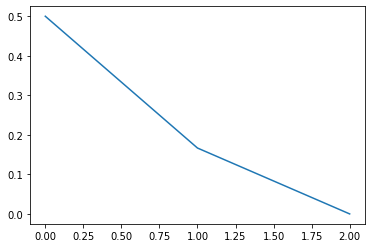

In [ ]:
#Les valeurs propres et les vecteurs propres
valp, vectp = LA.eig(V)
print("Les valeurs propres : \n",valp,"\n\n")
print("Les vecteurs propes : \n",vectp)

plt.plot(sorted(valp,reverse=True))

In [ ]:
Trace = V[0][0] + V[1][1] + V[2][2]
Trace

0.6666666666666667

In [ ]:
#Les taux d'inertie porté sur chaque axe(de 1 à 3)
T = []
for i in range(3):
  T.append((valp[i]/Trace) * 100)
T

[74.99999999999993, -5.452626367183788e-15, 24.999999999999996]

In [ ]:
#On prend le 1 et le 3 eme
u1 = vectp.T[0]
u2 = vectp.T[2]
norme_u1 = np.sqrt((u1[0]**2 + u1[1]**2 + u1[2]**2))
print(norme_u1)
print()
norme_u2 = np.sqrt((u2[0]**2 + u2[1]**2 + u2[2]**2))
print(norme_u2)

1.0

0.9999999999999999


##Les facteurs Lignes (Composantes principales)

In [ ]:
C1 = np.matmul(Y, u1)
C2 = np.matmul(Y, u2)
print('C1 = ', C1,"\n\n")
print('C2 = ', C2)

C1 =  [-0.61237244  0.         -1.22474487  0.61237244  1.22474487] 


C2 =  [-0.35355339  0.          0.70710678 -0.35355339  0.70710678]


##La matrice des projections des profils-lignes sur chaque axe

In [ ]:
#La matrice des projections des profils-lignes sur chaque axe
mtx = np.array([C1, C2])
mtx = mtx.T
mtx

array([[-0.61237244, -0.35355339],
       [ 0.        ,  0.        ],
       [-1.22474487,  0.70710678],
       [ 0.61237244, -0.35355339],
       [ 1.22474487,  0.70710678]])

##les Facteurs colonnes du nuage de profils-colonnes

In [ ]:
fi1 = (np.sqrt(valp[0])/g[0]) * u1
fi2 = (np.sqrt(valp[2])/g[1]) * u2
matricefi =np.array([fi1, fi2])
matricefi

array([[-8.66025404e-01, -2.67144583e-16,  8.66025404e-01],
       [ 2.88675135e-01, -5.77350269e-01,  2.88675135e-01]])

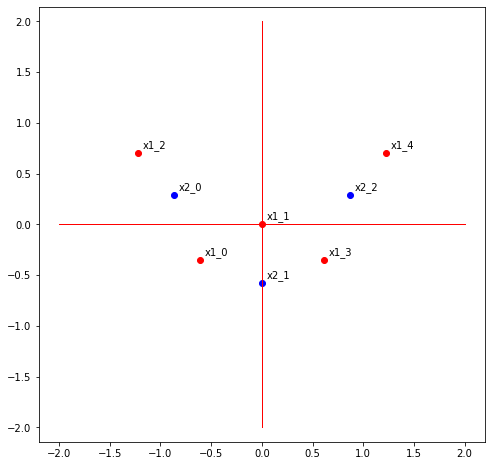

In [ ]:
(fig, ax) = plt.subplots(figsize = (8,8))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

for i in range(0, fi1.shape[0]):
  plt.text(fi1[i] + 0.05, fi2[i] +0.05, "x2_"+str(i))

plt.scatter(fi1, fi2,c='b', marker="o" )
an = np.linspace(0, 2*np.pi, 100 )

plt.axis('equal')

#ajouter les axes
plt.plot([-2,2],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='red',linestyle='-',linewidth=1)

for i in range(0, C1.shape[0]):
  plt.text(C1[i] + 0.05, C2[i] +0.05, "x1_"+str(i))

plt.scatter(C1, C2,c='r', marker="o" )
plt.show()

l'interpretation graphique est trés utile pour voir les les relations entre les differents points dans le nouveau espace.

Un point de grande coordonnée peut très bien avoir
une faible contribution à l’axe, et inversement.

Comme en ACP, si un point est très éloigné du reste du nuage et
détermine à lui seul la direction du premier axe.

les points qui sont proches sont dans une forte relation comme(x1_1 et x2_1)

on remarque aussi qu'on a des point symetriques par rapport aus axes proncipaux comme x2_2 et x2_0 

In [ ]:
#La contibution
C11=0
C22=0

for i in range(3):
  C11 =((1/fmc[i])*(fi1[i]**2)/valp[0])
  C22 =((1/fmc[i])*(fi2[i]**2)/valp[2])
  print(C11,C22)  

4.499999999999997 1.4999999999999982
4.281973677867996e-31 6.000000000000004
4.500000000000004 1.4999999999999982
